Comparison between the sexes (Male vs Female) for the ages

**Need to run first:**
- [`../0-prepare_data`](../0-prepare_data.ipynb)
- [`1-extract_samples`](1-extract_samples.ipynb)
- [`2-run_dge_analysis`](2-run_dge_analysis.ipynb)
- [`3-previsualize_data`](3-previsualize_data.ipynb)

**Table of content**
1. [Differentially expressed genes](#Differentially-expressed-genes)
2. [Stats about the DEG](#Stats-about-the-DEG)
3. [DEG with significant p-value and fold change](#DEG-with-significant-p-value-and-fold-change)
    1. [Log2FC](#Log2FC)
    2. [Z-score](#Z-score)
4. [Co-expression (WGCNA)](#Co-expression-(WGCNA))
    1. [Z-score in modules](#Z-score-in-modules)
    2. [Genes in modules](#Genes-in-modules)
5. [Enrichment analysis](#Enrichment-analysis)
    1. [GO analysis](#GO-analysis)
    2. [KEGG pathways](#KEGG-pathways)
    
*Generated from a Jupyter Notebook - [Sources](https://github.com/bebatut/neuromac_GF_mices/blob/master/src/sex-driven-aging/4-analyze_sex_effect_given_ages.ipynb)*

# Loads

## Libraries and functions

In [1]:
source("../load_libraries.R")

Warning message:
“package ‘reshape2’ was built under R version 3.6.3”
Warning message:
“package ‘XML’ was built under R version 3.6.3”


Allowing multi-threading with up to 4 threads.


Warning message:
“package ‘reshape’ was built under R version 3.6.3”
Warning message:
“package ‘plotly’ was built under R version 3.6.3”
Warning message:
“package ‘dplyr’ was built under R version 3.6.3”
Warning message:
“package ‘tibble’ was built under R version 3.6.3”
Warning message:
“package ‘factoextra’ was built under R version 3.6.3”
Warning message:
“package ‘ggrepel’ was built under R version 3.6.3”
preparing gene to GO mapping data...

preparing IC data...

preparing gene to GO mapping data...

preparing IC data...

preparing gene to GO mapping data...

preparing IC data...



In [2]:
source("../functions.R")

## Data

In [3]:
dp = "../../results/dge/sex-driven-aging/"
dir_path = paste(dp, "4-analyze_sex_effect_given_ages/", sep='')
dir.create(dir_path, showWarnings = FALSE)

In [4]:
load("../../results/dge/gene_length.RData")
load(paste(dp, "filtered_metadata.RData", sep=''))
load(paste(dp, "dge.RData", sep=''))
load(paste(dp, "contrasts.RData", sep=''))
load(paste(dp, "filtered_norm_counts.RData", sep=''))
load(paste(dp, "filtered_z_scores.RData", sep=''))
load(paste(dp, "dge_net_pal2.RData", sep=''))
load(paste(dp, "col_order.RData", sep=''))
load(paste(dp, "annot_col.RData", sep=''))
load(paste(dp, "annot_colors.RData", sep=''))
load(paste(dp, "genes_in_modules.RData", sep=''))
load(paste(dp, "all_deg_genes.RData", sep=''))

# Differentially expressed genes

Extract DEG between Male and Female for the different ages and microbiota combinations
- Threshold for adjusted p-value: 0.05
- Threshold for adjusted significant fold change: 1.5

Table with the factors / constrasts

In [5]:
sub_contrasts = contrasts %>%
    filter(Info == 'Male vs Female (Young)' | 
           Info == 'Male vs Female (Middle-aged)' |
           Info == 'Male vs Female (Old)')
sub_contrasts

Info,Intercept,Male vs Female,Middle-aged vs Young,Old vs Young,Male & Middle-aged,Male & Old
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Male vs Female (Young),0,1,0,0,0,0
Male vs Female (Middle-aged),0,1,0,0,1,0
Male vs Female (Old),0,1,0,0,0,1


In [6]:
deg_results = lapply(sub_contrasts$Info, function(x) get_dge_results(x, dge, sub_contrasts))
names(deg_results) = sub_contrasts$Info

Extract the log2FC of the DEG

In [7]:
deg = extract_DEG_log2FC(deg_results, dir_path)

Warning message:
“`data_frame()` is deprecated as of tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


In [8]:
all_deg_genes = unique(c(all_deg_genes, deg$sign_fc_deg$genes))
save(all_deg_genes, file=paste(dir_path, "all_deg_genes.RData", sep=''))

# Stats

Warning message:
“`funs()` is deprecated as of dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”
Using type as id variables



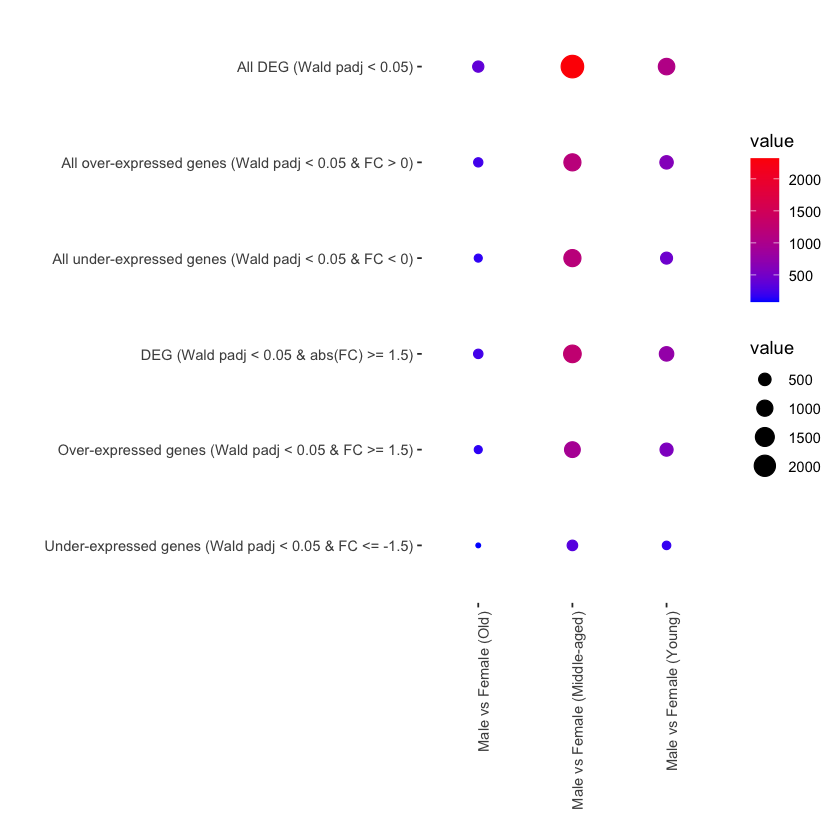

,Male vs Female (Young),Male vs Female (Middle-aged),Male vs Female (Old)
,<int>,<int>,<int>
All DEG (Wald padj < 0.05),1056,2320,375
All over-expressed genes (Wald padj < 0.05 & FC > 0),608,1157,221
All under-expressed genes (Wald padj < 0.05 & FC < 0),448,1163,154
DEG (Wald padj < 0.05 & abs(FC) >= 1.5),747,1252,232
Over-expressed genes (Wald padj < 0.05 & FC >= 1.5),571,936,153
Under-expressed genes (Wald padj < 0.05 & FC <= -1.5),176,316,79


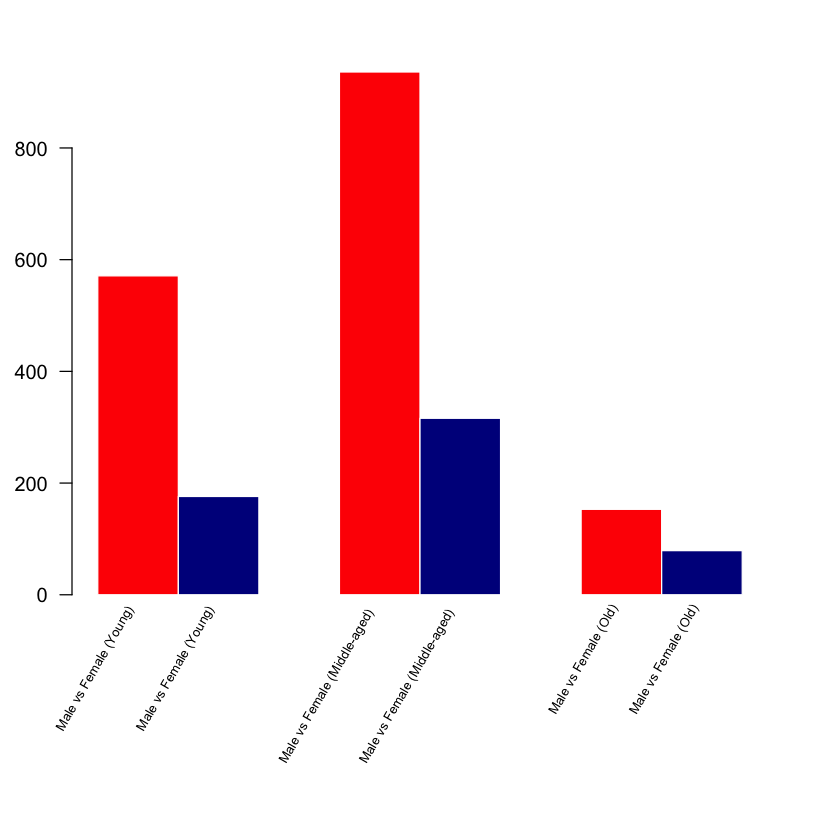

In [9]:
deg = extract_DEG_stats(deg, dir_path)
deg$stat

All DEG (Wald padj < 0.05)

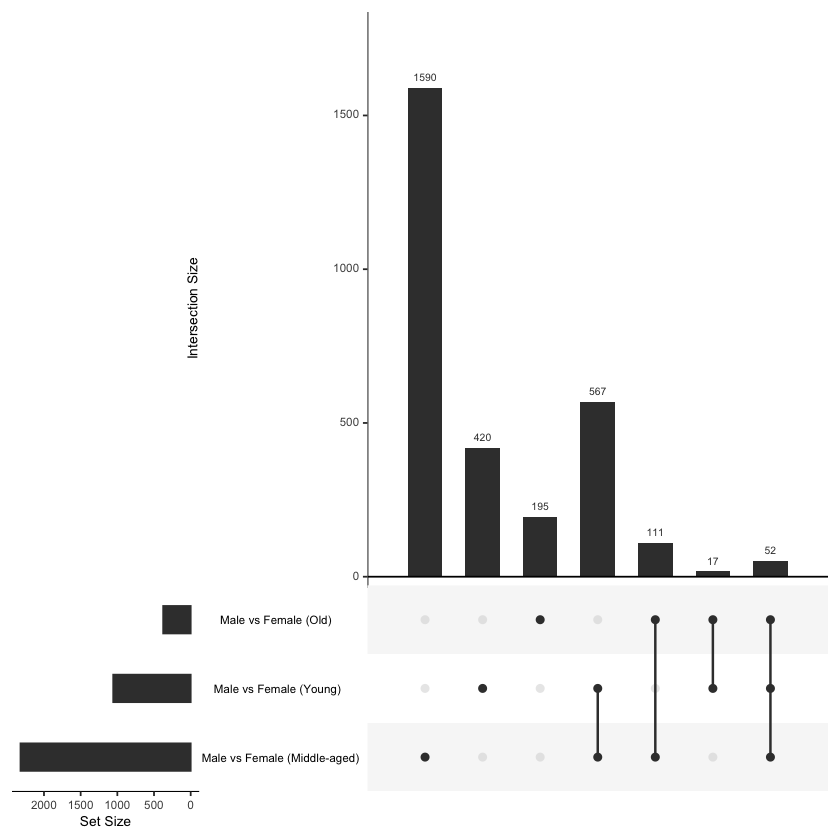

In [10]:
plot_sign_DEG_upset(deg)

DEG (Wald padj < 0.05 & abs(FC) > 1.5)

pdf 
  2

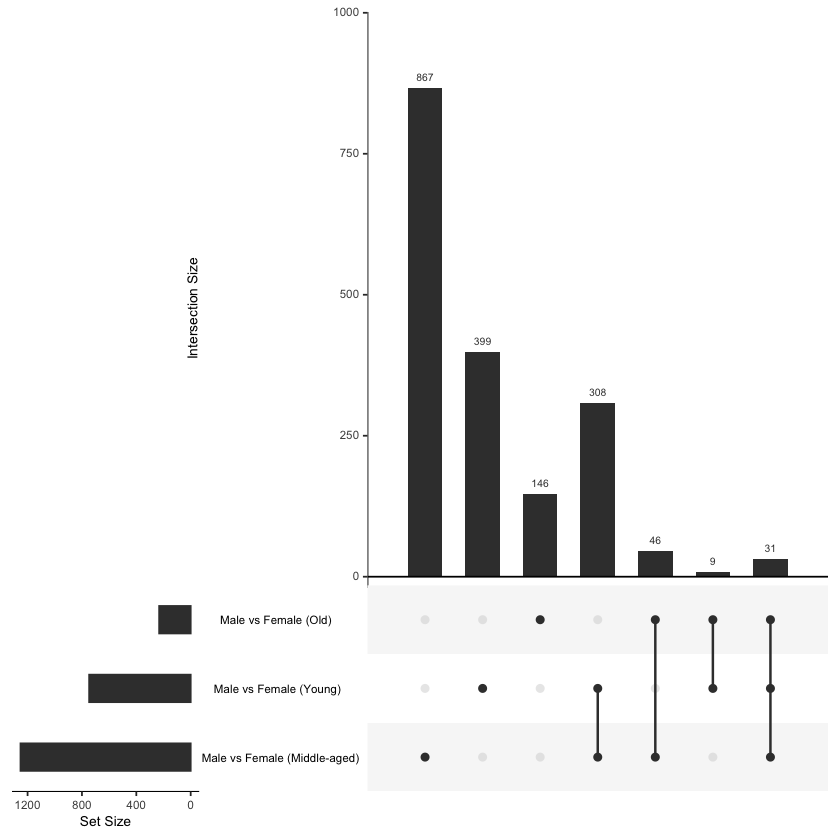

In [11]:
pdf(paste(dir_path, "sign_FC_DEG_upset.pdf", sep=''))
plot_sign_FC_DEG_upset(deg)
dev.off()
plot_sign_FC_DEG_upset(deg)

# DEG (Wald padj < 0.05 & abs(FC) > 1.5)

## Log2FC

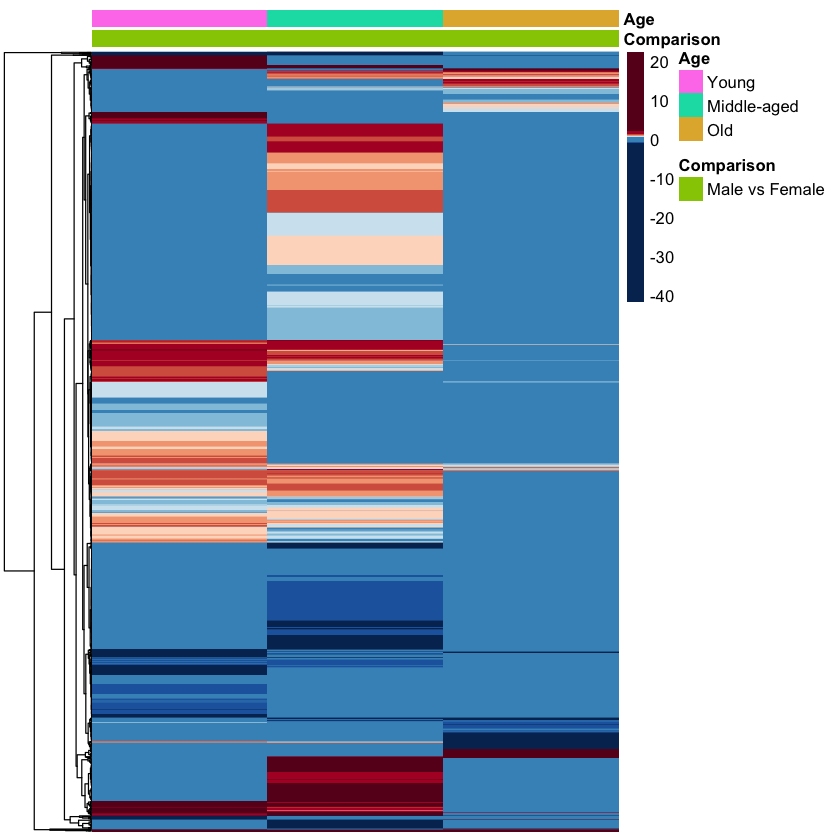

In [12]:
data = deg$sign_fc_deg %>% select(-genes)
fc_annot = data.frame(Comparison = rep("Male vs Female", 3),
                      Age = c("Young", "Middle-aged", "Old"),
                      row.names = colnames(data))
plot_fc_heatmap(data, fc_annot)

## Z-score

In [13]:
comps = list(
    "Male vs Female (Young)" = c(metadata %>% filter(Age == "Young" & Sex == "Female") %>% pull(sample),
                  metadata %>% filter(Age == "Young" & Sex == "Male") %>% pull(sample)),
    "Male vs Female (Middle-aged)" = c(metadata %>% filter(Age == "Middle-aged" & Sex == "Female") %>% pull(sample),
                  metadata %>% filter(Age == "Middle-aged" & Sex == "Male") %>% pull(sample)),
    "Male vs Female (Old)" = c(metadata %>% filter(Age == "Old" & Sex == "Female") %>% pull(sample),
                  metadata %>% filter(Age == "Old" & Sex == "Male") %>% pull(sample))
)
comps

$`Male vs Female (Young)`
[1] "SPF_8w_F_1_2" "SPF_8w_F_3_2" "SPF_8w_F_4_2" "SPF_8w_M_2_2" "SPF_8w_M_3_2"
[6] "SPF_8w_M_4_2"

$`Male vs Female (Middle-aged)`
 [1] "SPF_52w_F_2_2" "SPF_52w_F_3_2" "SPF_52w_F_4_2" "SPF_52w_F_5_2"
 [5] "SPF_52w_F_6_2" "SPF_52w_M_1_2" "SPF_52w_M_2_2" "SPF_52w_M_3_2"
 [9] "SPF_52w_M_4_2" "SPF_52w_M_5_2"

$`Male vs Female (Old)`
 [1] "SPF_104w_F_1_2"  "SPF_104w_F_2_2"  "SPF_104w_F_3_2"  "SPF_104w_M_1_2" 
 [5] "SPF_104w_M_10_2" "SPF_104w_M_11_2" "SPF_104w_M_12_2" "SPF_104w_M_13_2"
 [9] "SPF_104w_M_14_2" "SPF_104w_M_2_2"  "SPF_104w_M_4_2"  "SPF_104w_M_5_2" 
[13] "SPF_104w_M_6_2"  "SPF_104w_M_7_2"  "SPF_104w_M_8_2"  "SPF_104w_M_9_2"

### Column order: age  -  sex

pdf 
  3

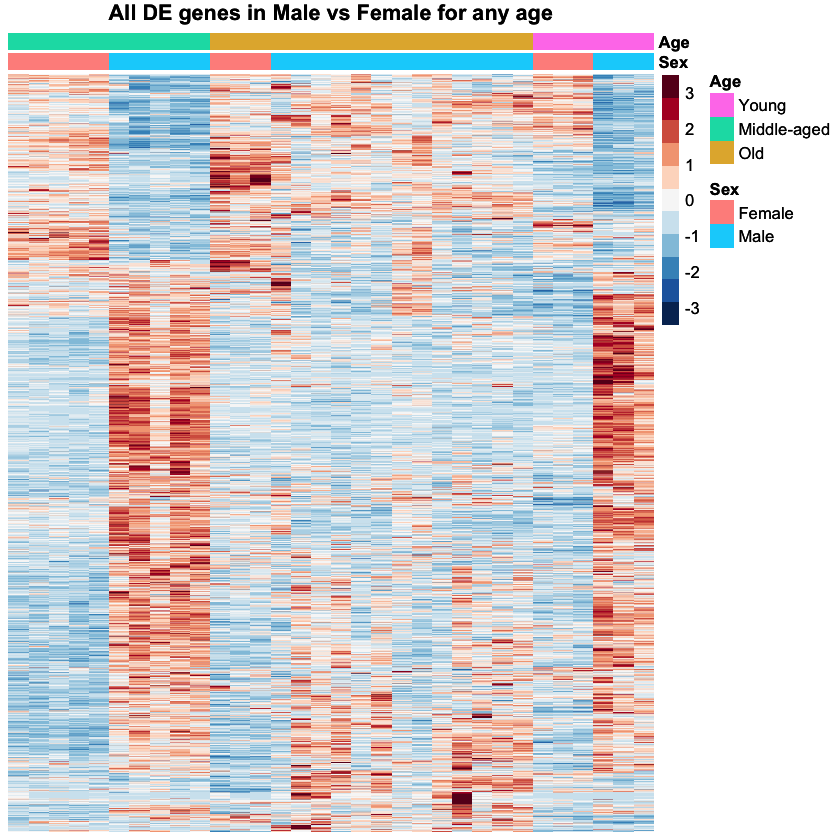

In [14]:
plot_z_score_heatmap(z_scores,
                     deg$sign_fc_deg$genes,
                     col_order$as,
                     annot_col$as,
                     "All DE genes in Male vs Female for any age",
                     col_order$as)
pdf(paste(dir_path, "z_score_as.pdf", sep=''))
plot_z_score_heatmap(z_scores,
                     deg$sign_fc_deg$genes,
                     col_order$as,
                     annot_col$as,
                     "All DE genes in Male vs Female for any age",
                     col_order$as)
dev.off()

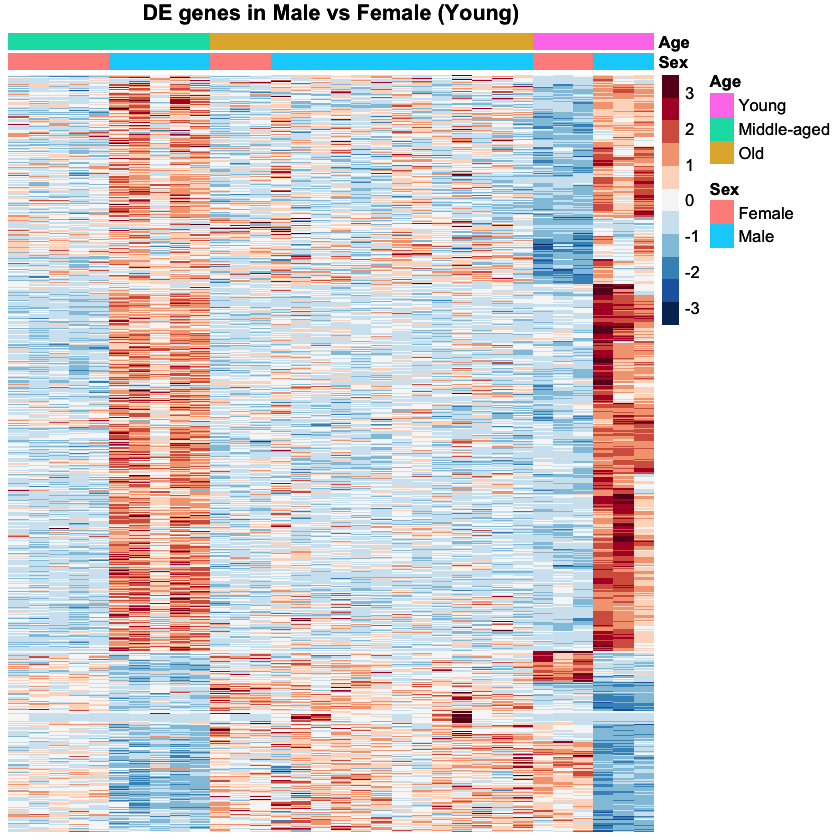

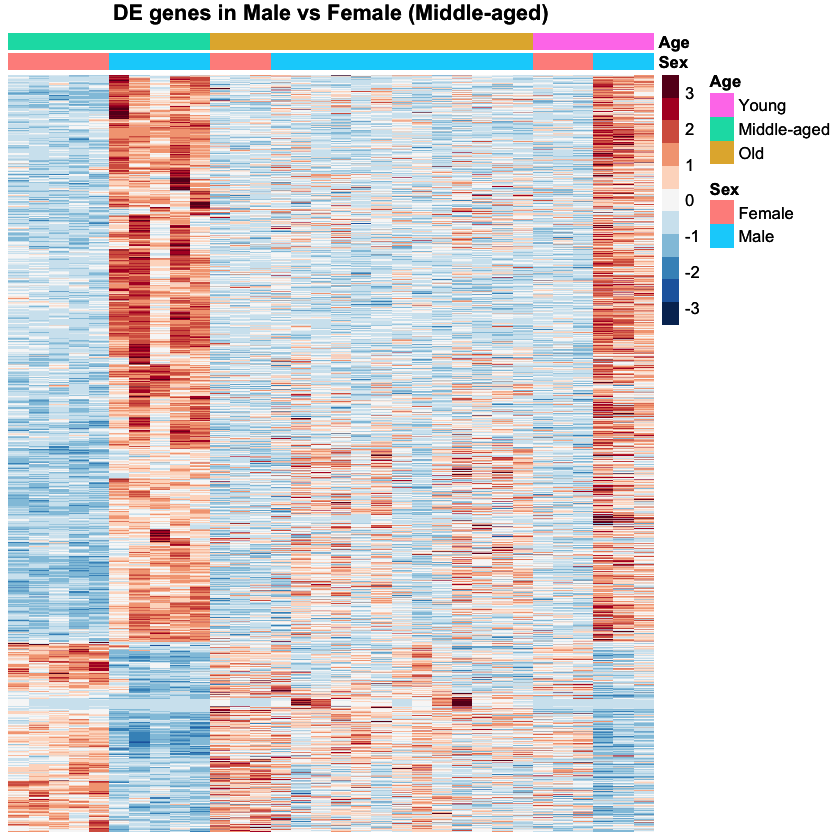

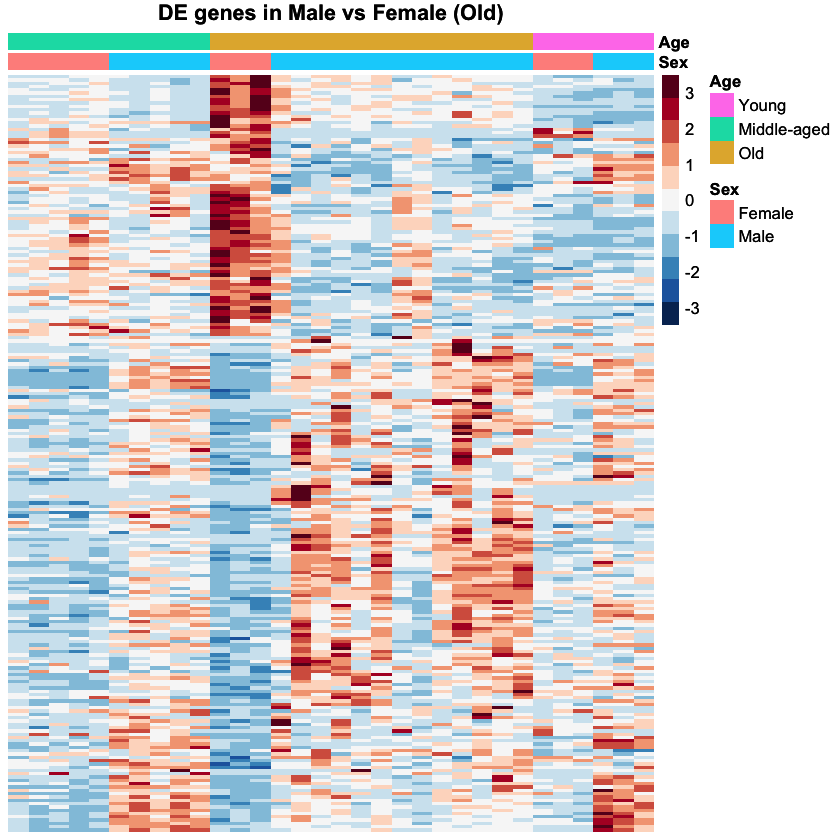

In [15]:
for(comp in names(comps)){
    plot_z_score_heatmap(z_scores,
        deg$sign_fc_deg %>% filter(!is.na((!!as.name(comp)))) %>% pull(genes),
        col_order$as,
        annot_col$as,
        paste("DE genes in", comp),
        comps[[comp]])
}

### Column order: sex - age

pdf 
  3

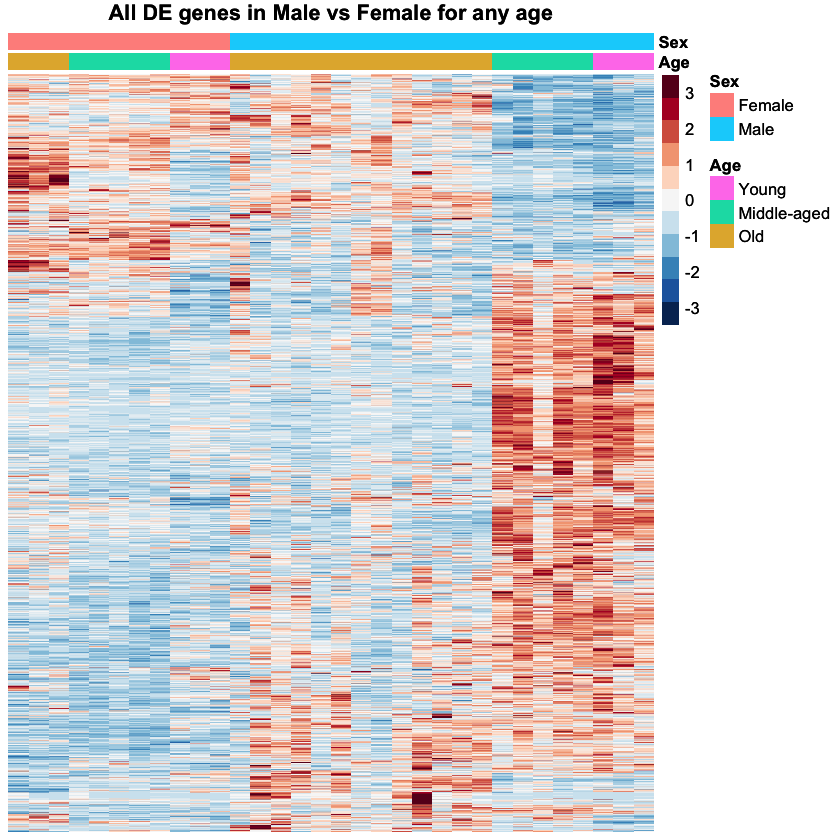

In [16]:
plot_z_score_heatmap(z_scores,
                     deg$sign_fc_deg$genes,
                     col_order$sa,
                     annot_col$sa,
                     "All DE genes in Male vs Female for any age",
                     col_order$sa)
pdf(paste(dir_path, "z_score_sa.pdf", sep=''))
plot_z_score_heatmap(z_scores,
                     deg$sign_fc_deg$genes,
                     col_order$sa,
                     annot_col$sa,
                     "All DE genes in Male vs Female for any age",
                     col_order$sa)
dev.off()

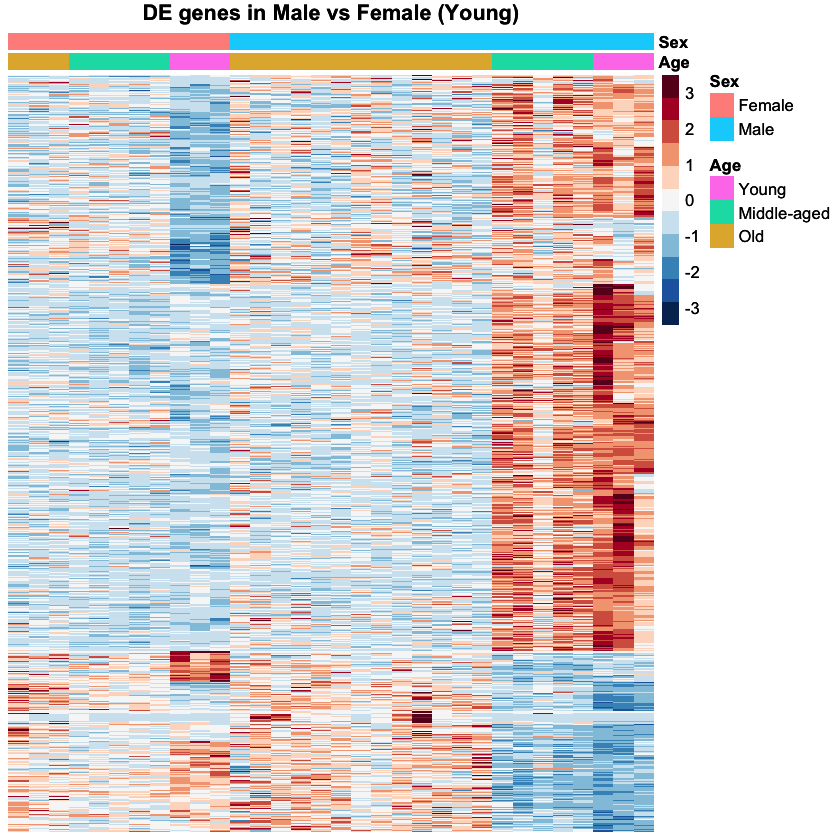

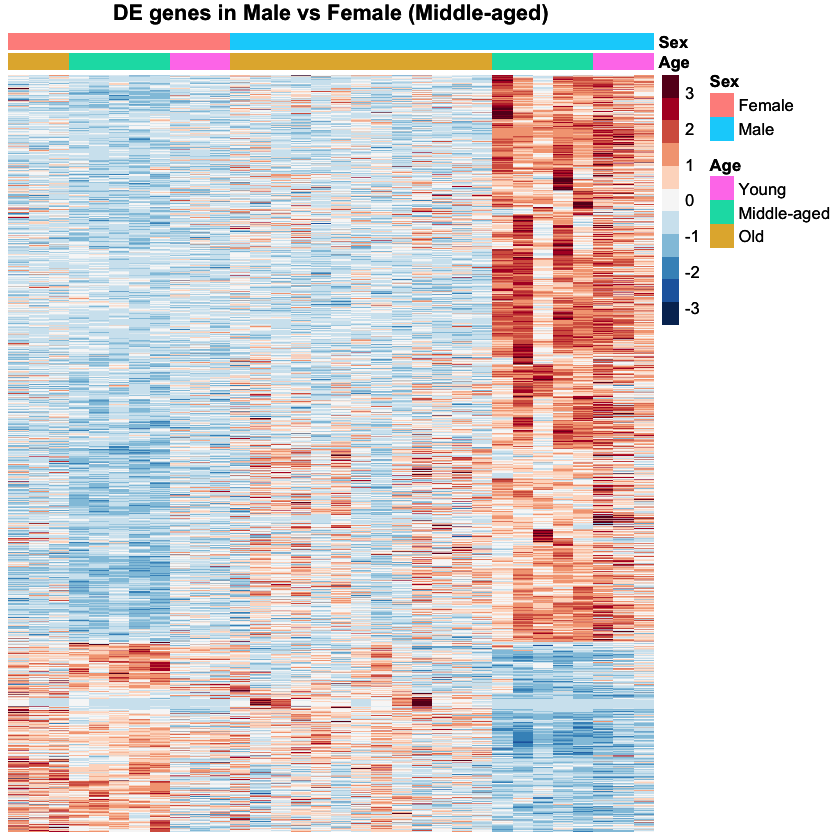

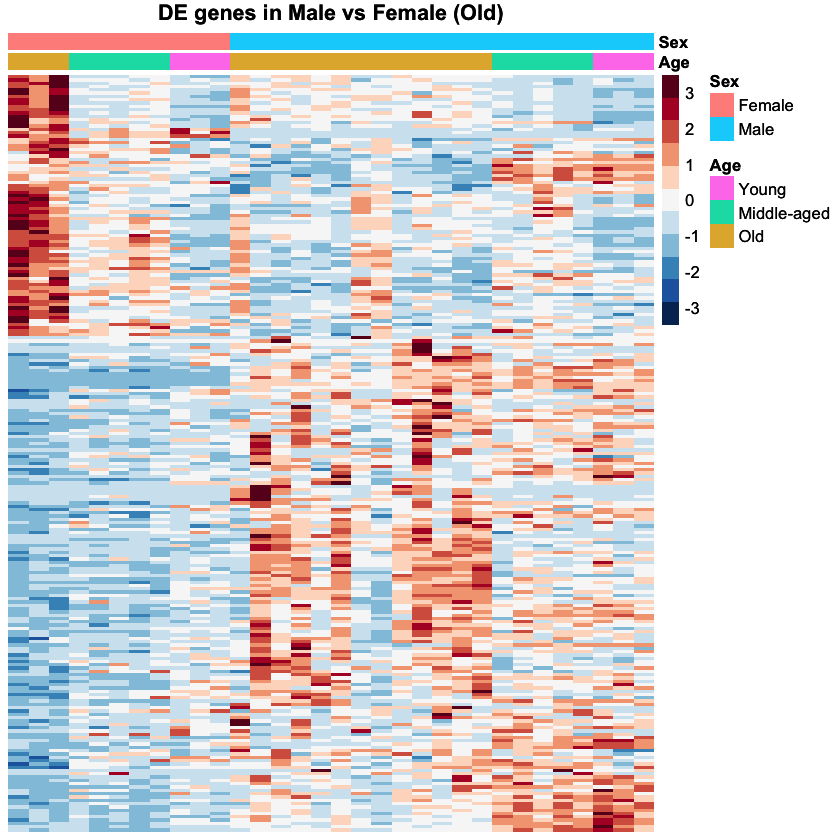

In [17]:
for(comp in names(comps)){
    plot_z_score_heatmap(z_scores,
        deg$sign_fc_deg %>% filter(!is.na((!!as.name(comp)))) %>% pull(genes),
        col_order$sa,
        annot_col$sa,
        paste("DE genes in", comp),
        comps[[comp]])
}

# Co-expression (WGCNA)

## Z-score in modules

In [18]:
comps = names(comps)

### Column order: age - sex

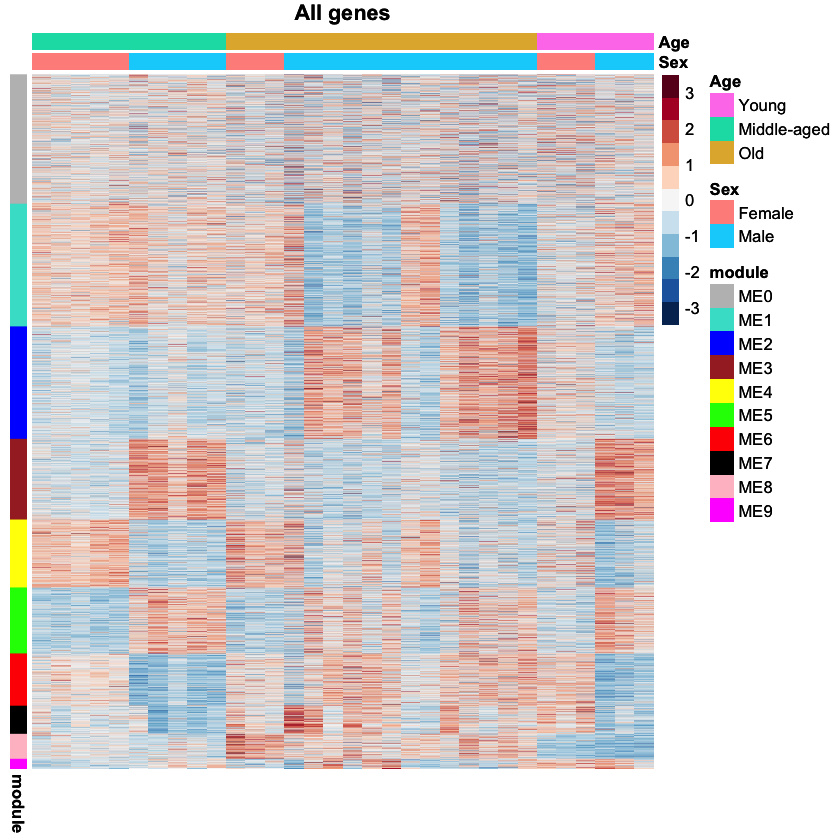

In [19]:
plot_z_score_heatmap_with_modules(z_scores,
                                  rownames(z_scores),
                                  col_order$as,
                                  annot_col$as,
                                  genes_in_modules,
                                  "All genes")

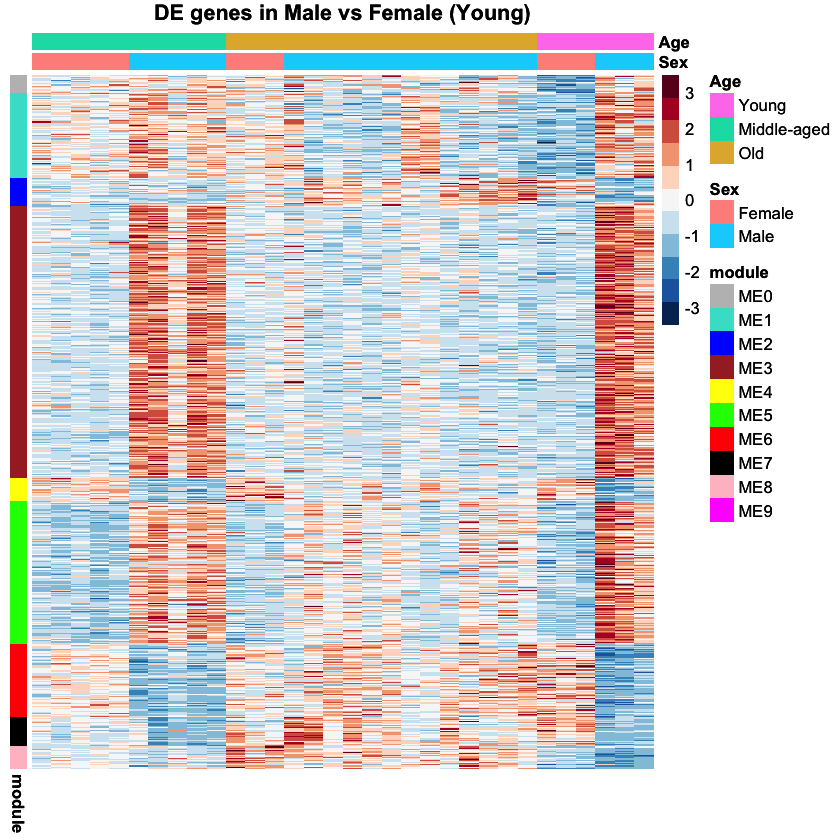

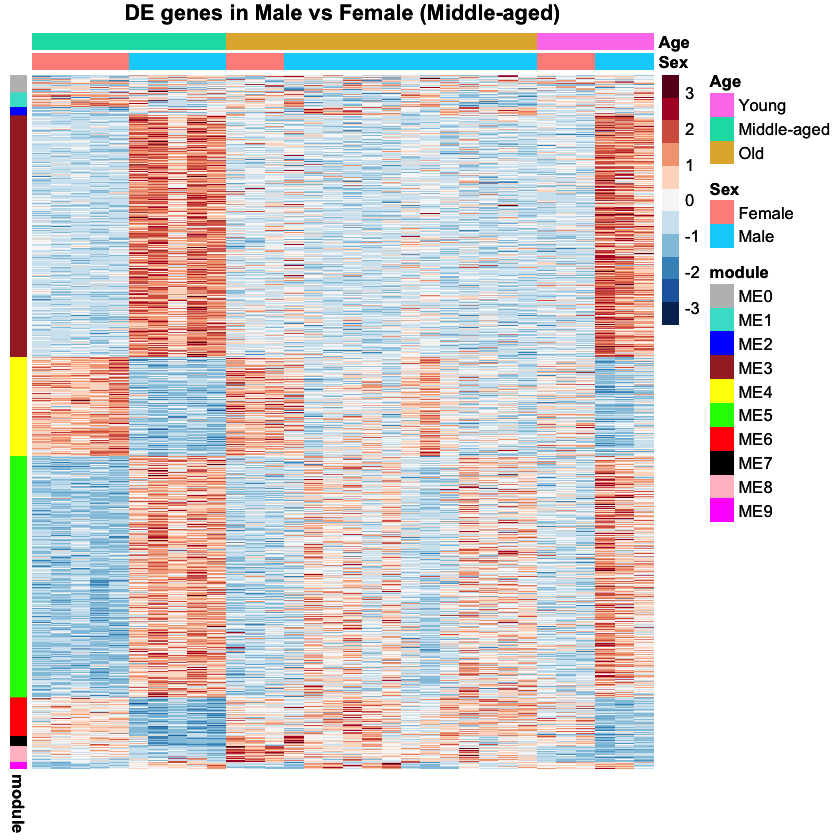

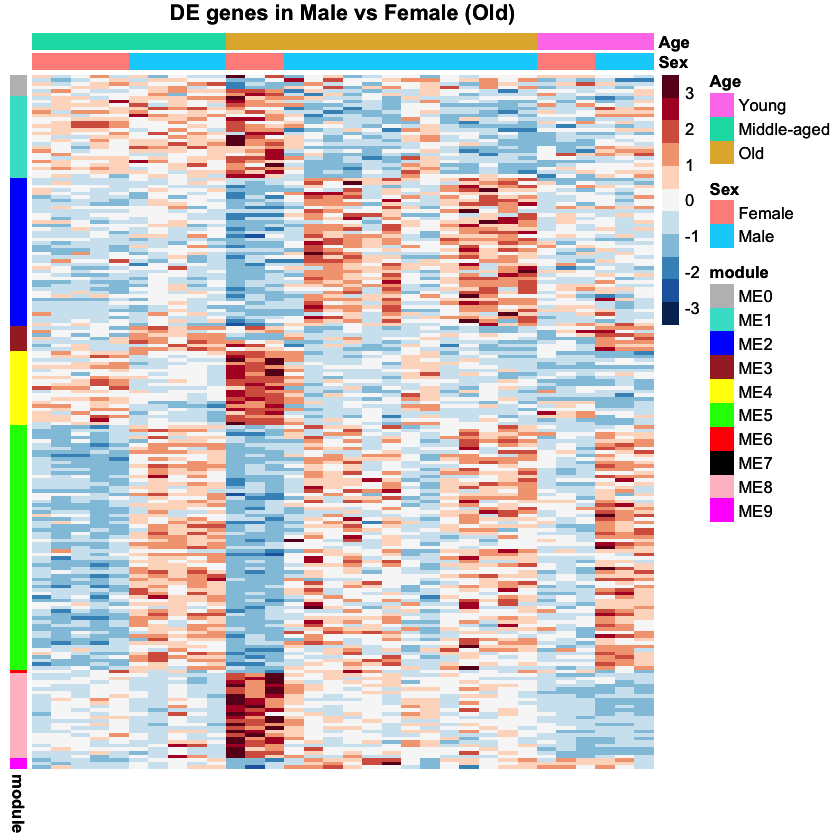

In [20]:
for(comp in comps){
    plot_z_score_heatmap_with_modules(z_scores,
        deg$sign_fc_deg %>% filter(!is.na((!!as.name(comp)))) %>% pull(genes),
        col_order$as,
        annot_col$as,
        genes_in_modules,
        paste("DE genes in", comp))
}

### Column order: sex - age

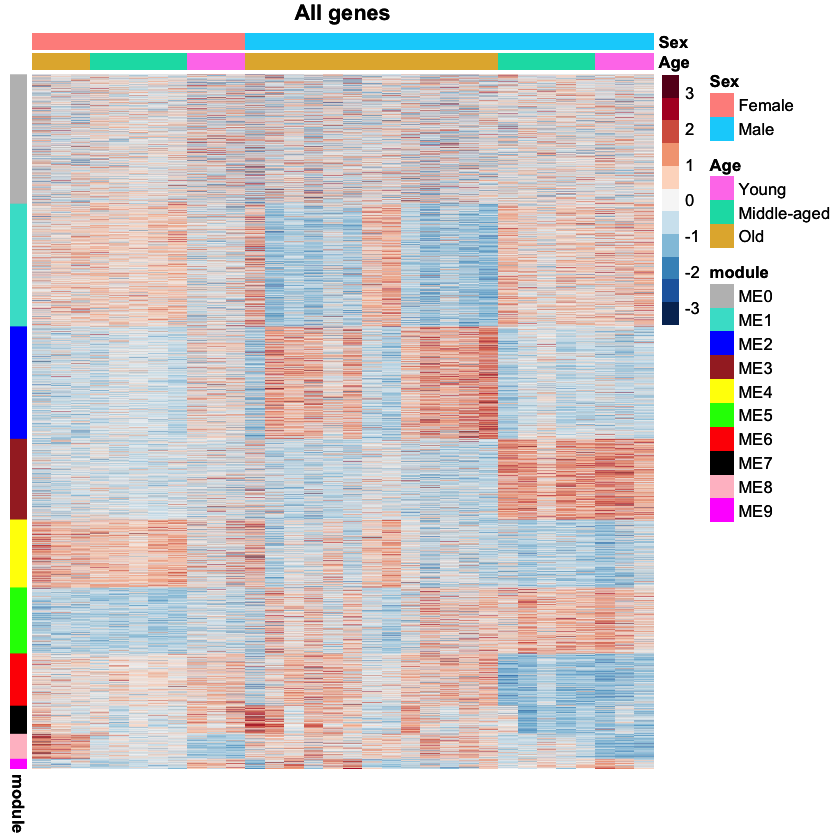

In [21]:
plot_z_score_heatmap_with_modules(z_scores,
    rownames(z_scores),
    col_order$sa,
    annot_col$sa,
    genes_in_modules,
    "All genes")

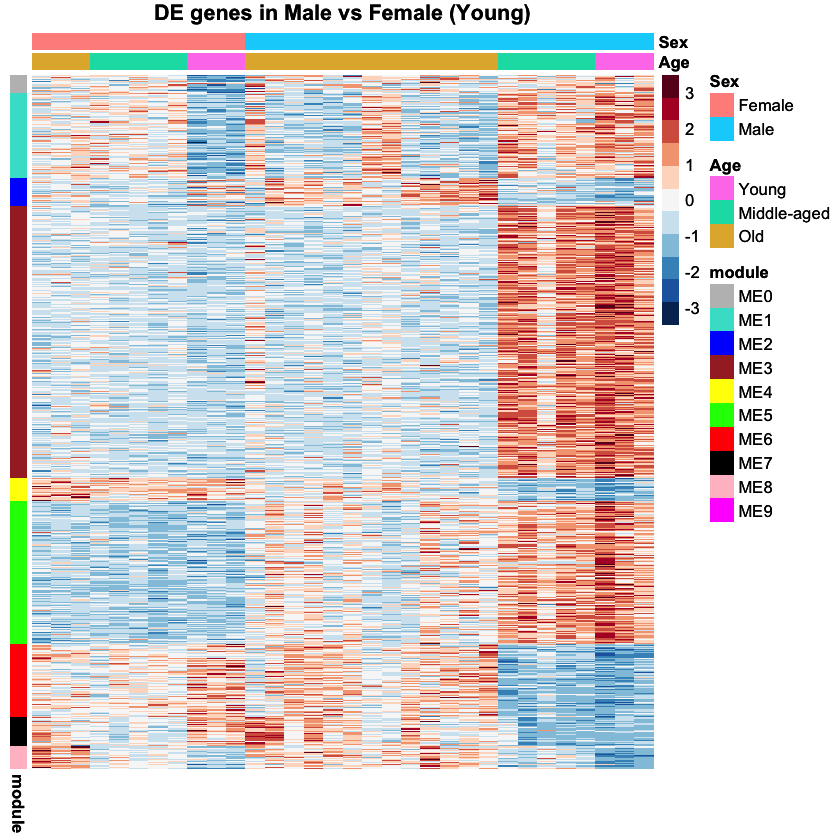

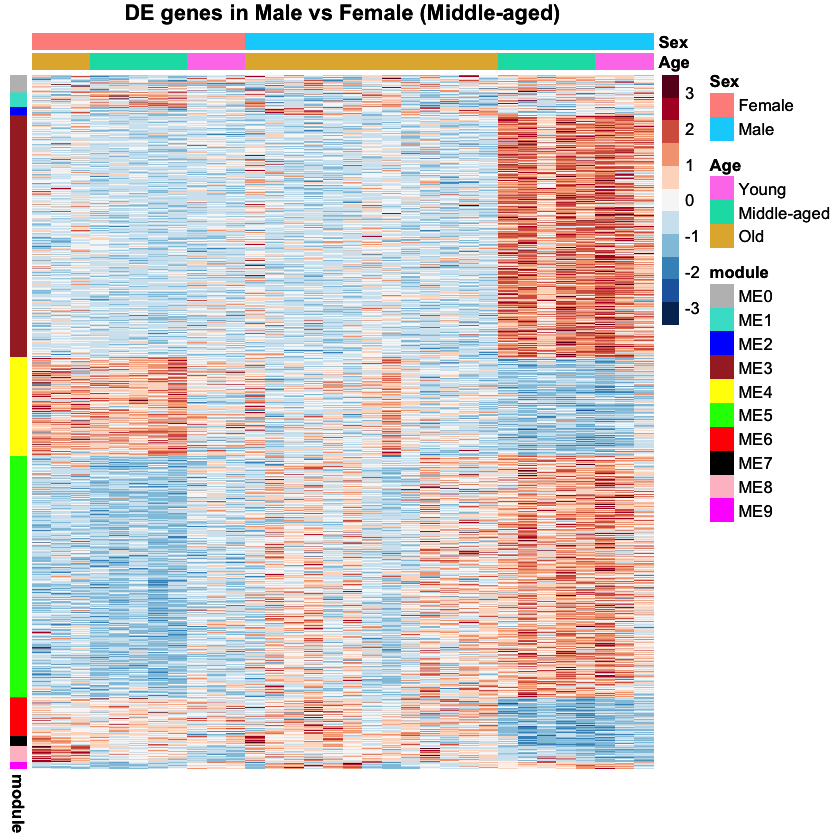

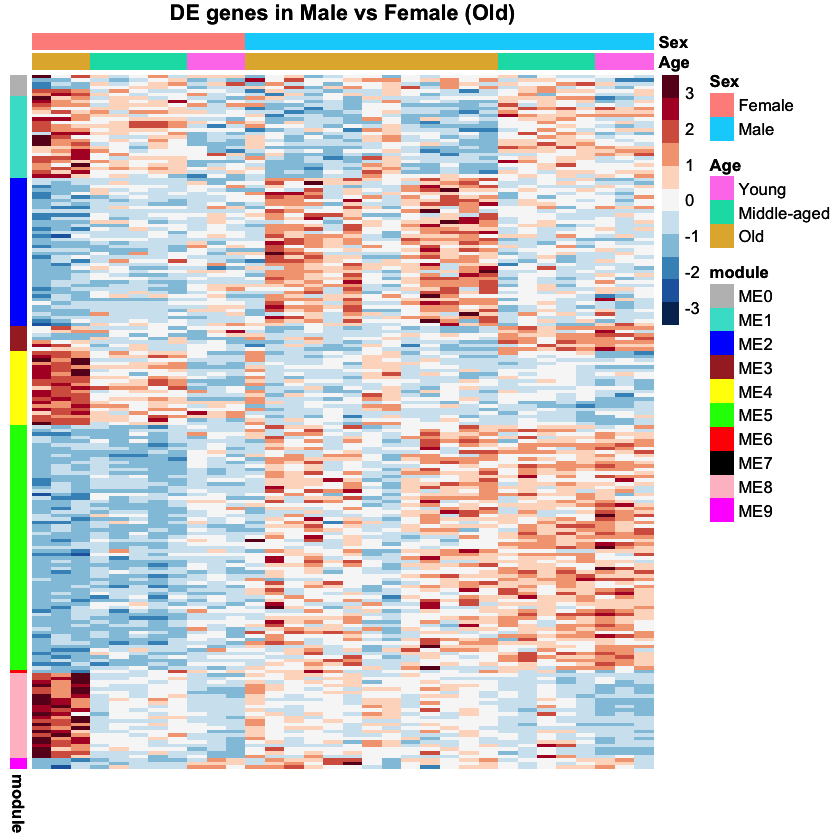

In [22]:
for(comp in comps){
    plot_z_score_heatmap_with_modules(z_scores,
        deg$sign_fc_deg %>% filter(!is.na((!!as.name(comp)))) %>% pull(genes),
        col_order$sa,
        annot_col$sa,
        genes_in_modules,
        paste("DE genes in", comp))
}

## Genes in modules

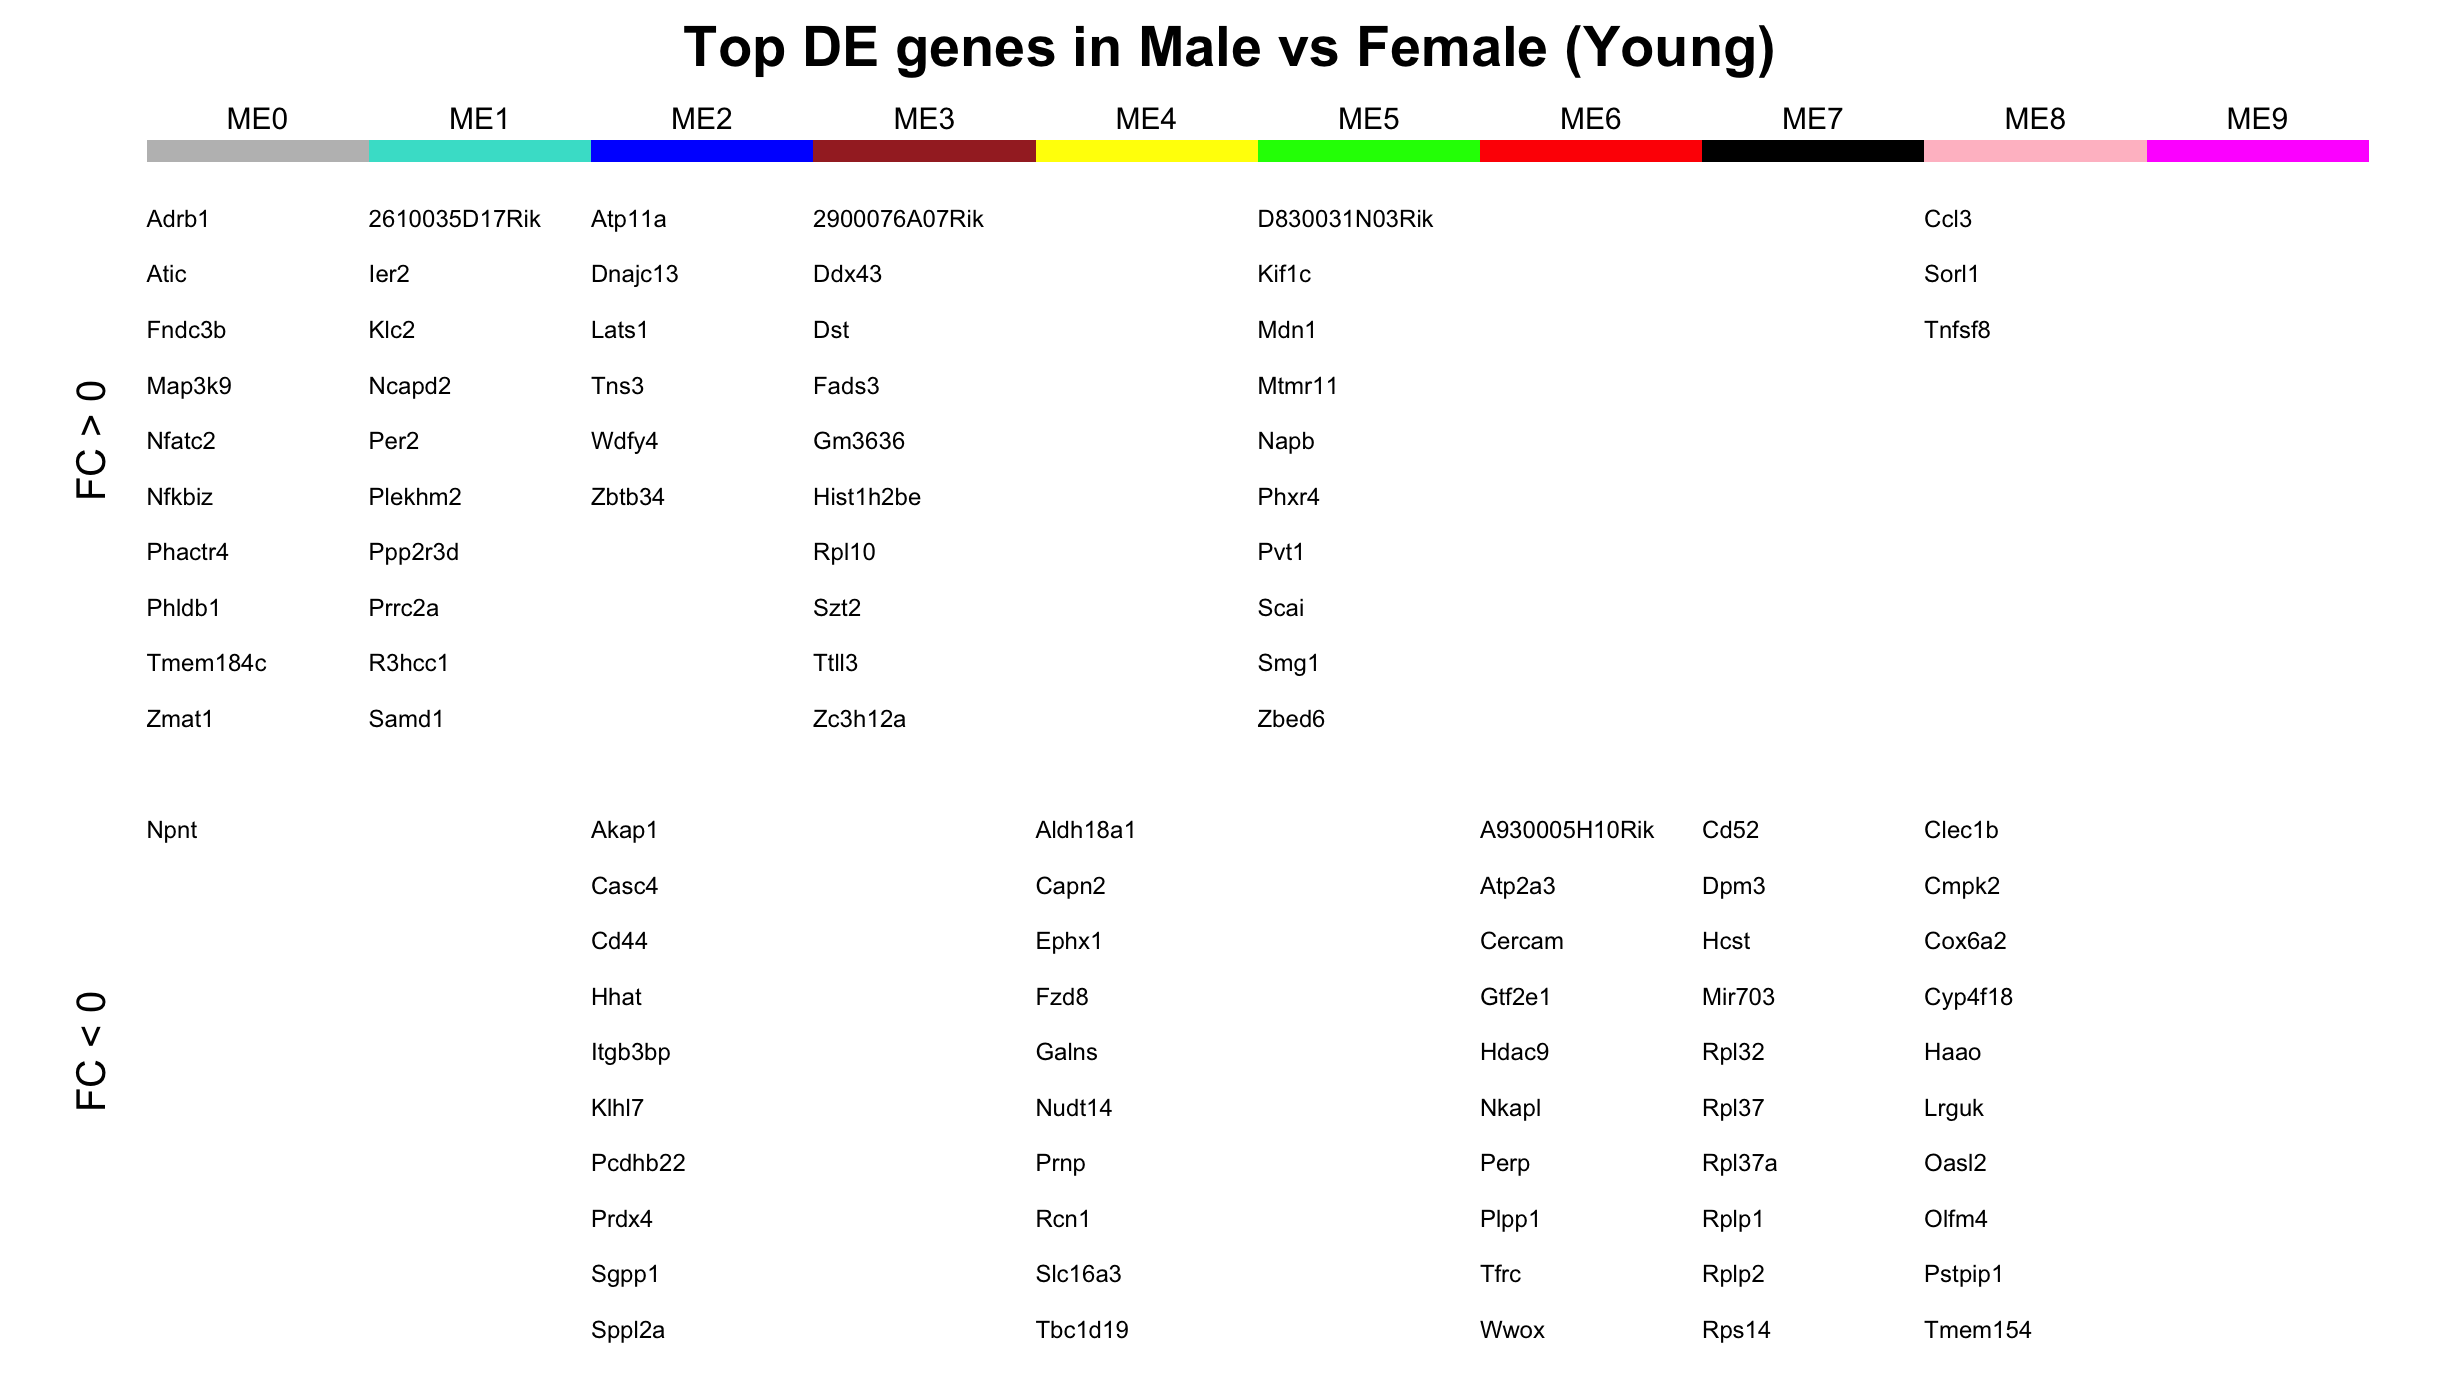

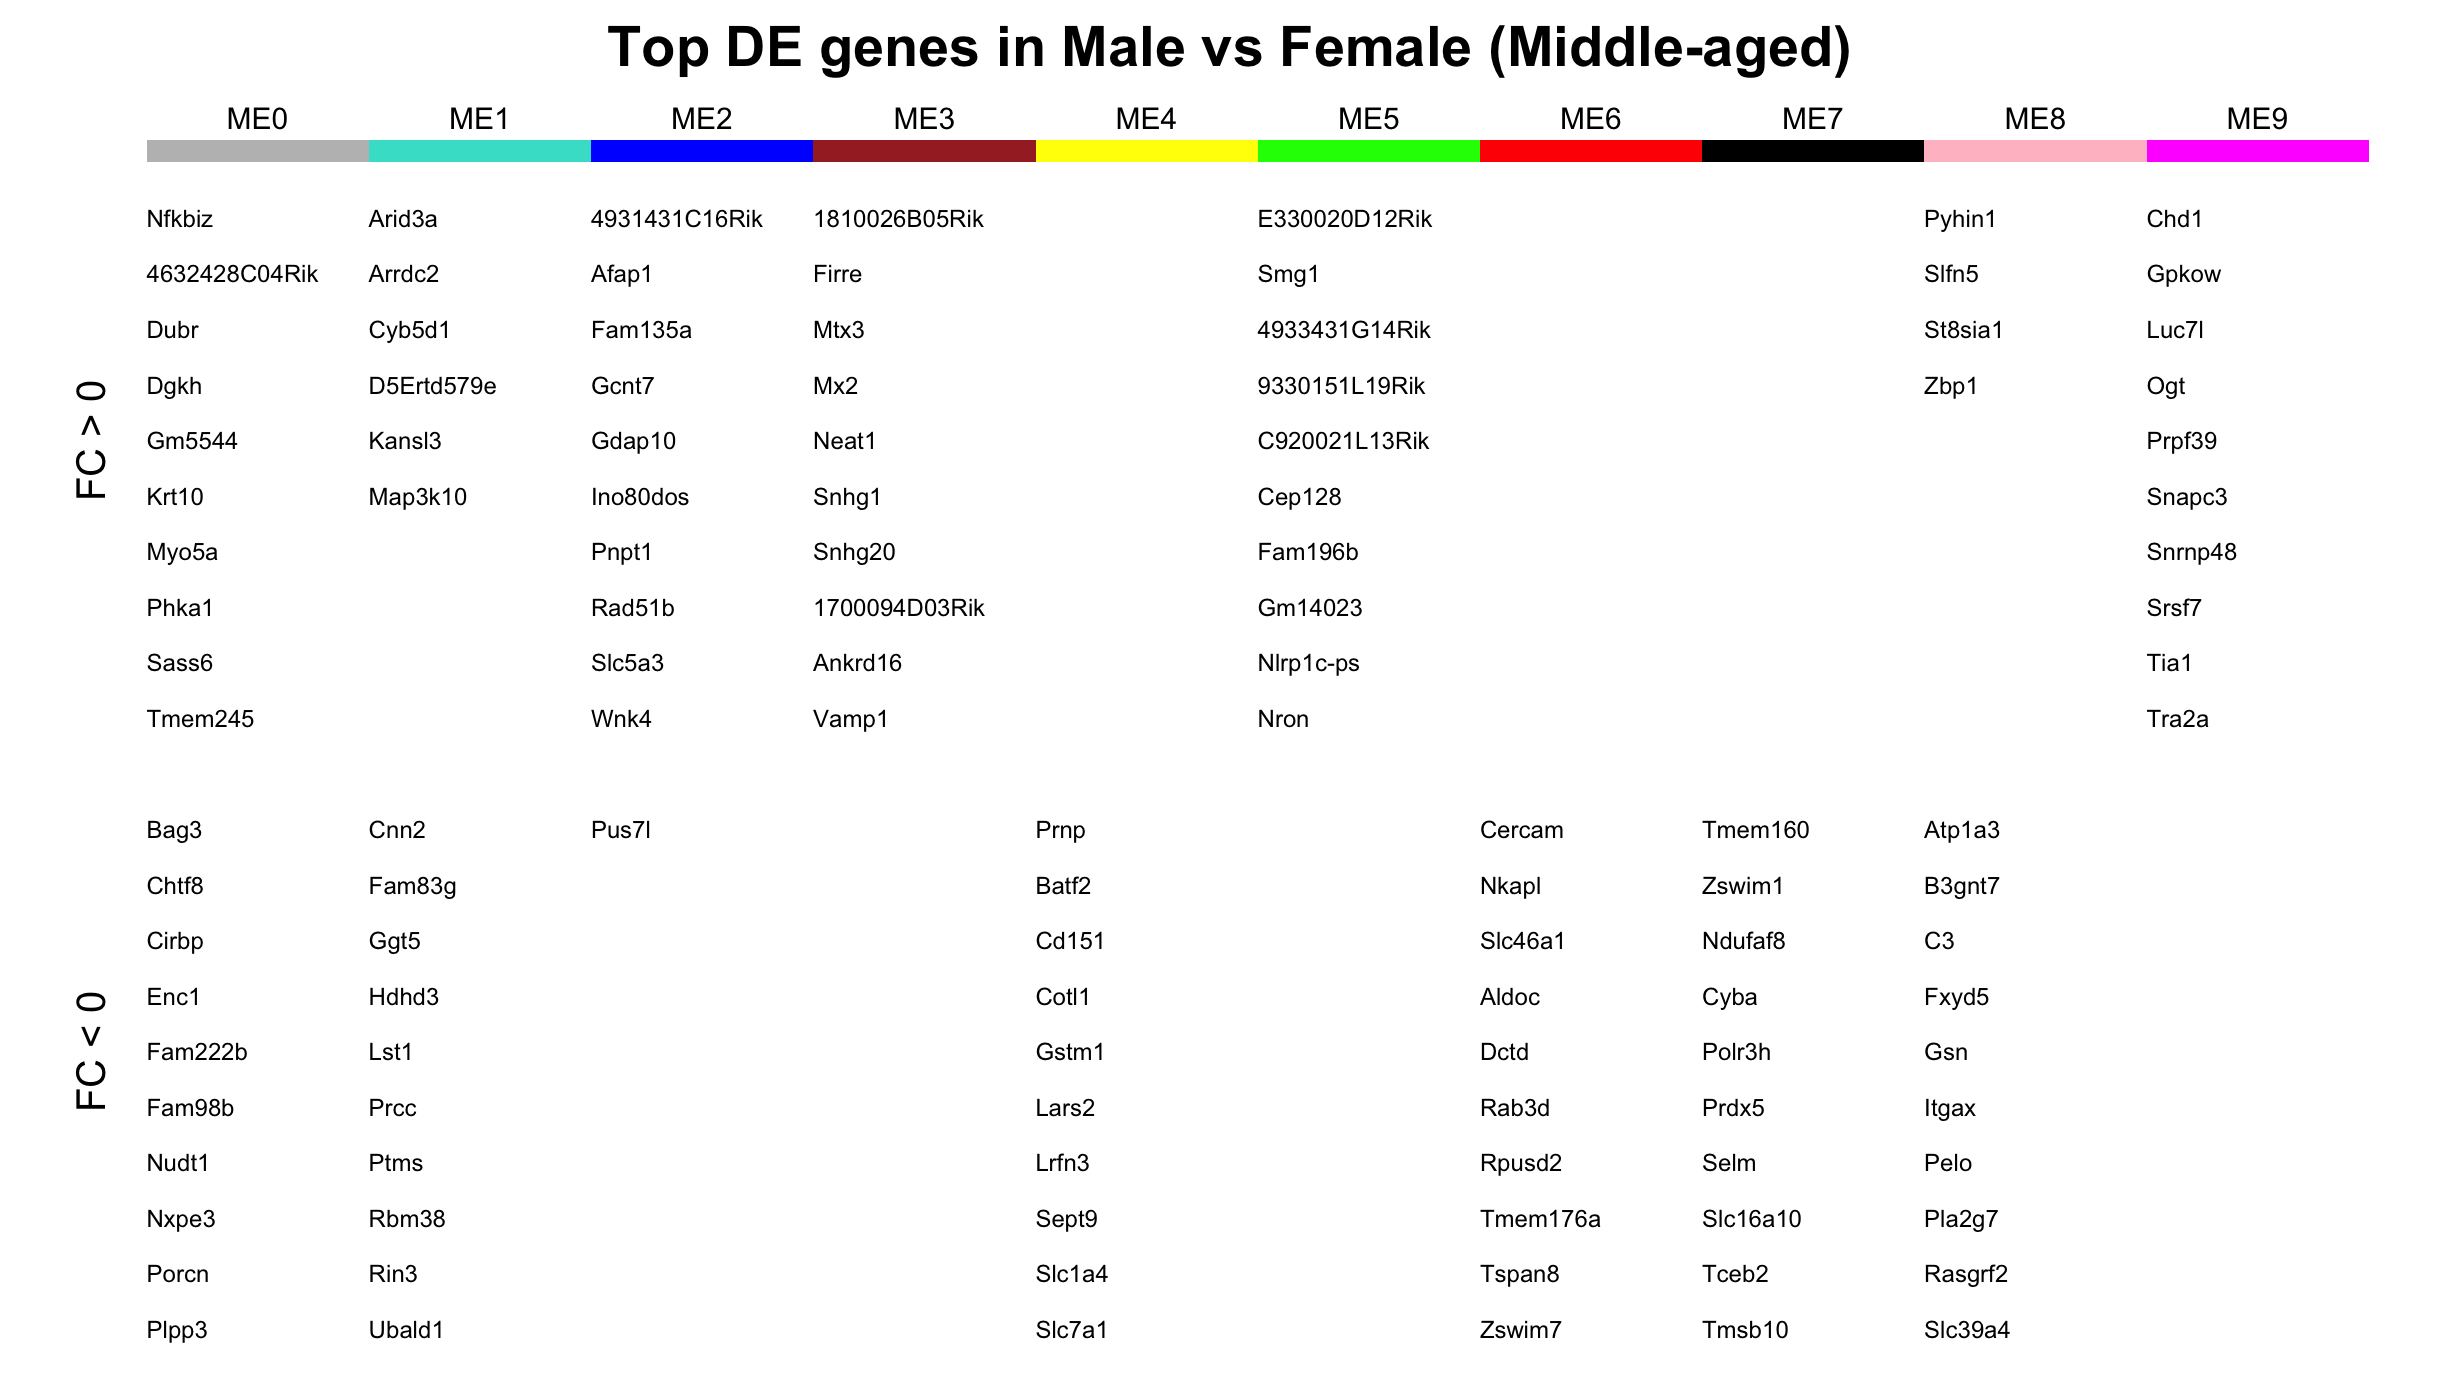

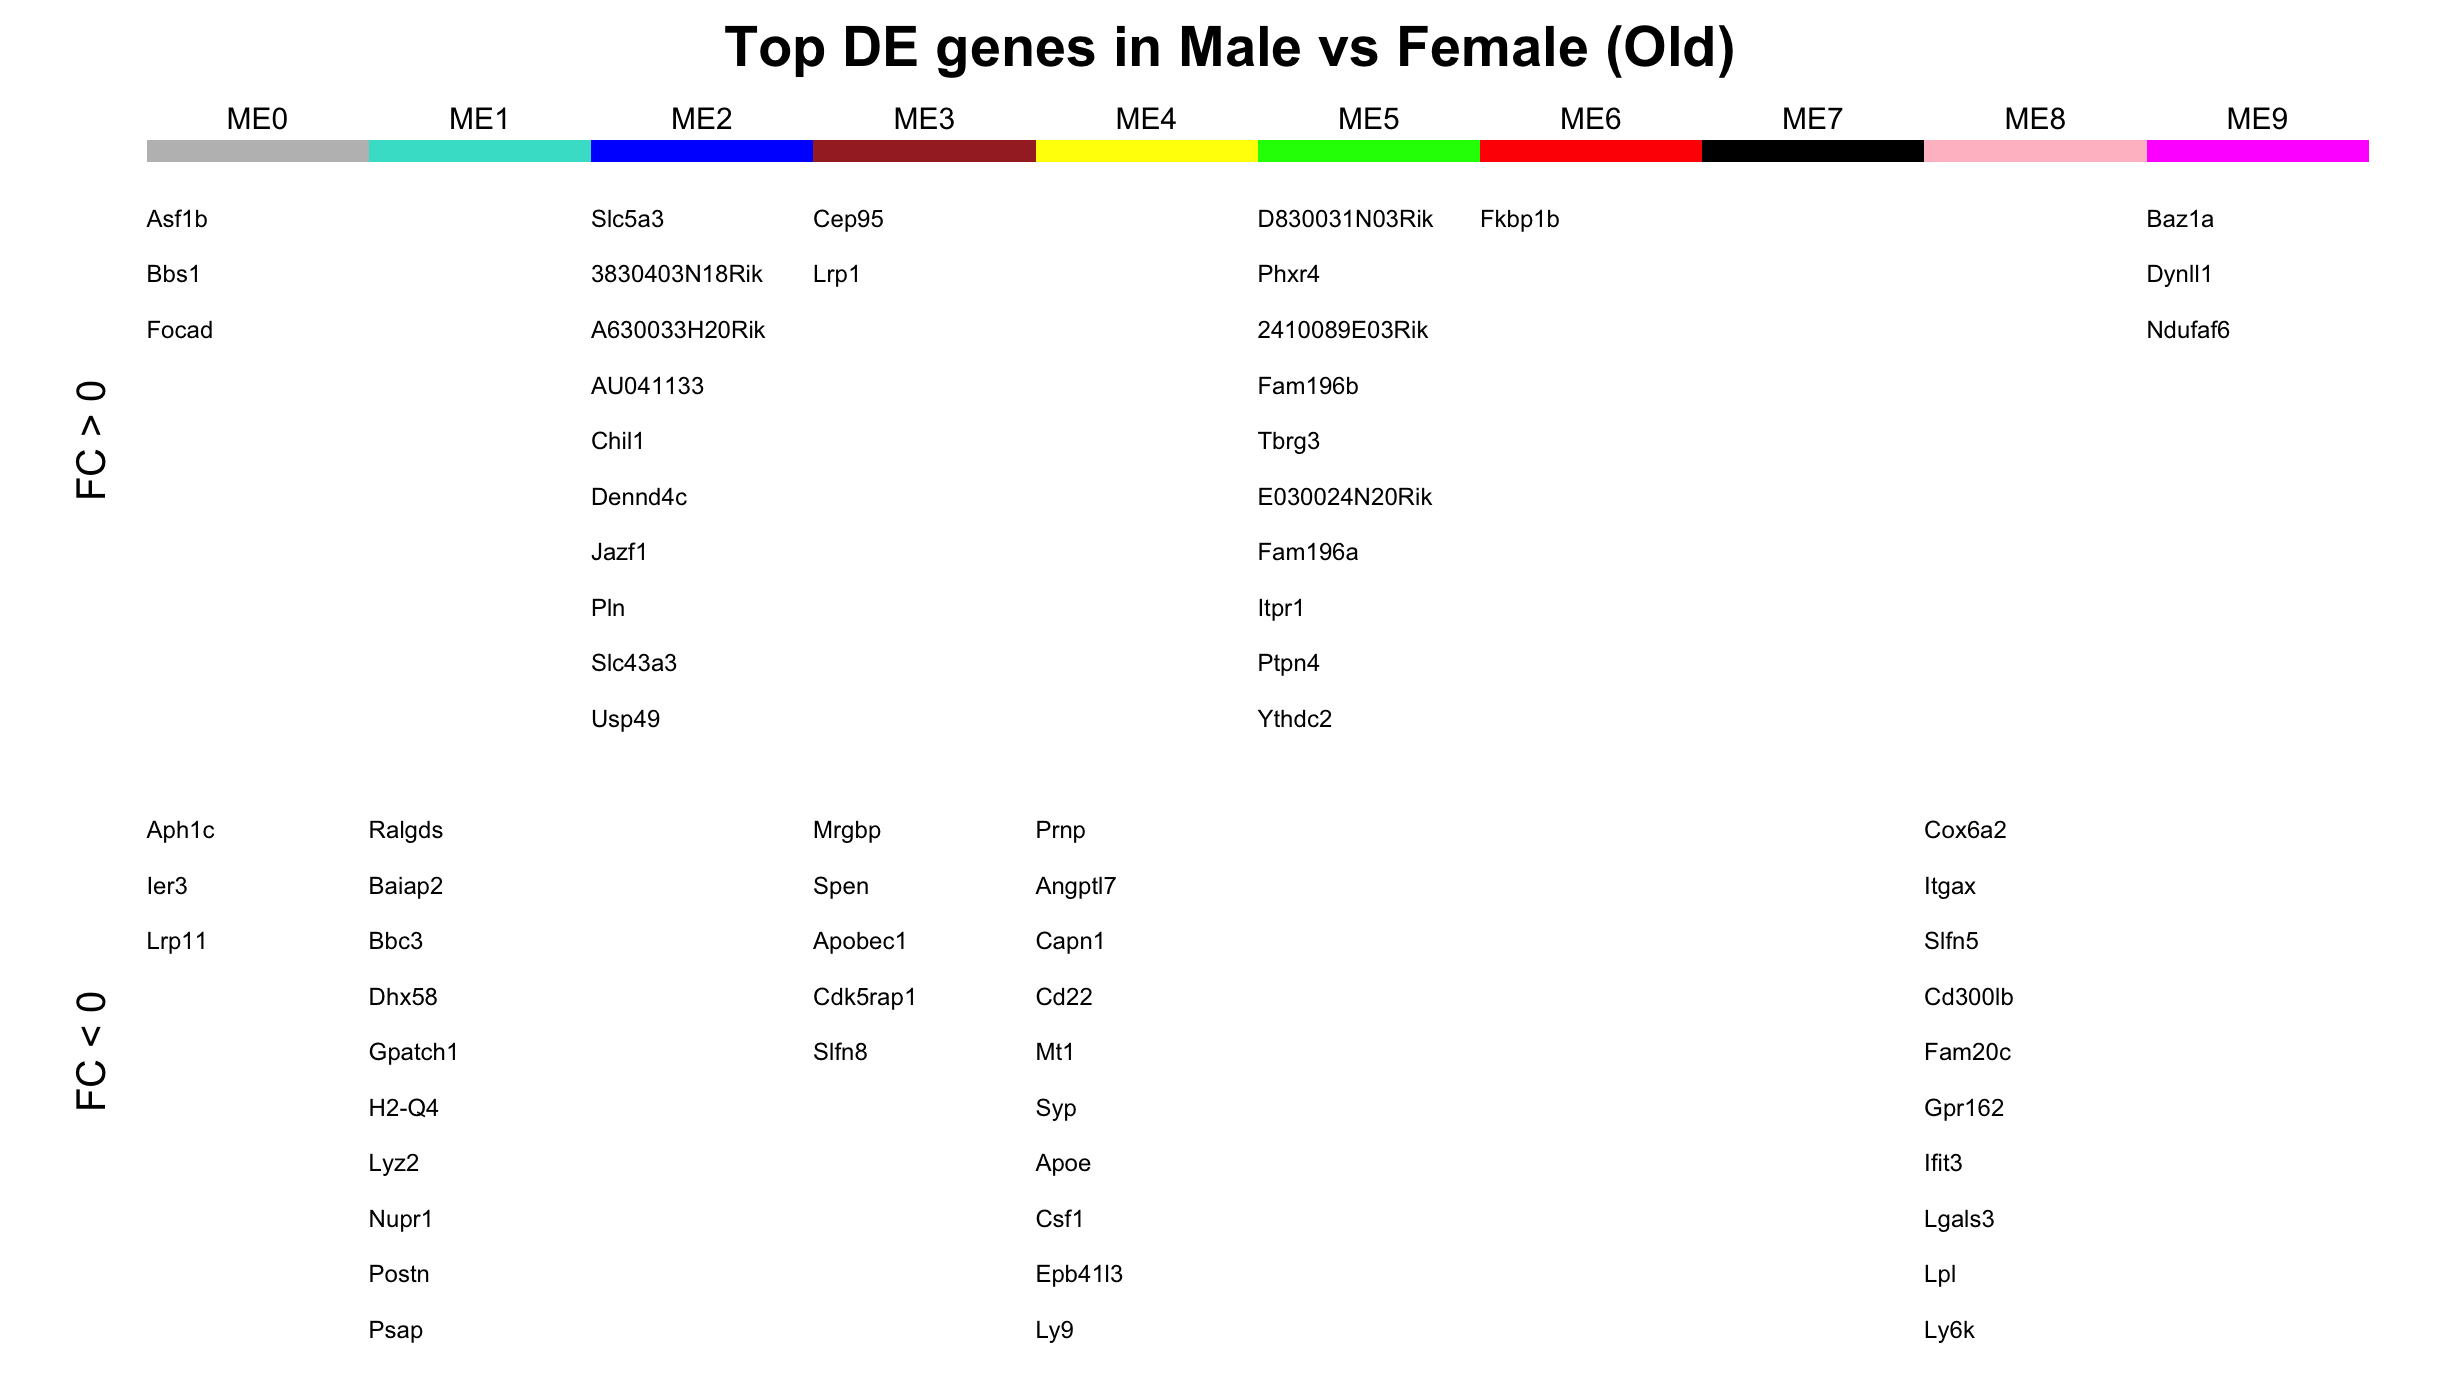

In [23]:
for(comp in comps){
    plot_top_deg_in_modules(deg$sign_fc_deg, comp, genes_in_modules)
}
options(repr.plot.width=7, repr.plot.height=7)

# Enrichment analysis

In [24]:
deg = fit_proba_weighting_function(deg, gene_length)

Warning message in pcls(G):
“initial point very close to some inequality constraints”
Warning message in pcls(G):
“initial point very close to some inequality constraints”
Warning message in pcls(G):
“initial point very close to some inequality constraints”


## GO analysis

In [25]:
deg = extract_GO_terms(deg, dir_path, "../../data/go_term_to_exclude.csv")

Warning message in stack.default(getgo(l$sign_fc_deg$genes, "mm10", "geneSymbol")):
“non-vector elements will be ignored”


### Biological process

Dot-plot with the 10 most significant p-values for the different comparison

Using category as id variables

Using category, type as id variables



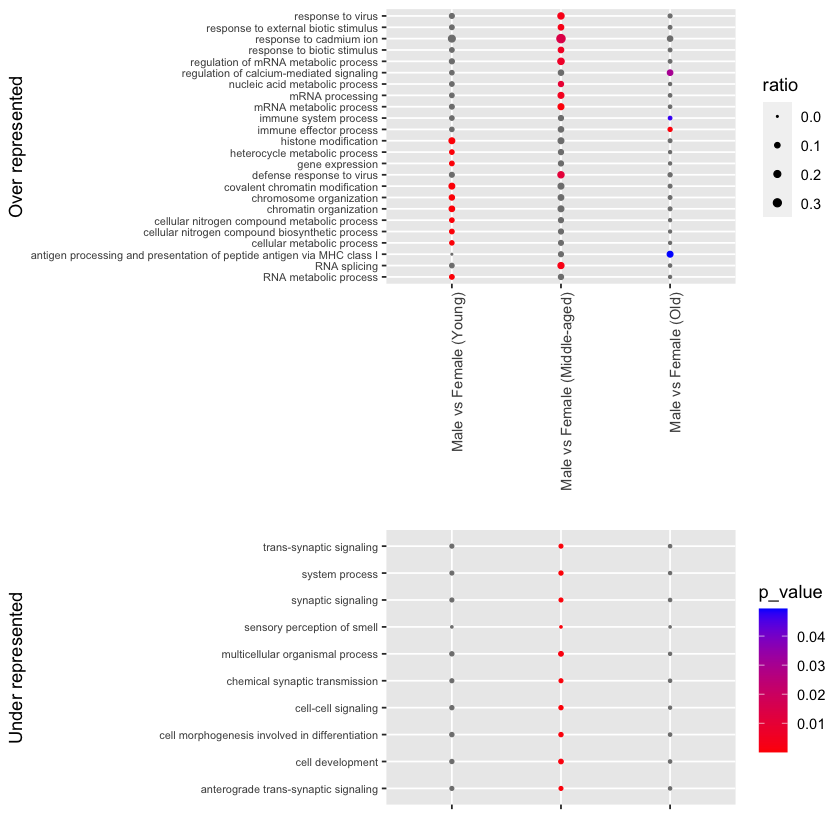

In [26]:
plot_top_go(deg, "BP", 10)

### Cellular components

Dot-plot with the 10 most significant p-values for the different comparison

Using category as id variables

Using category, type as id variables



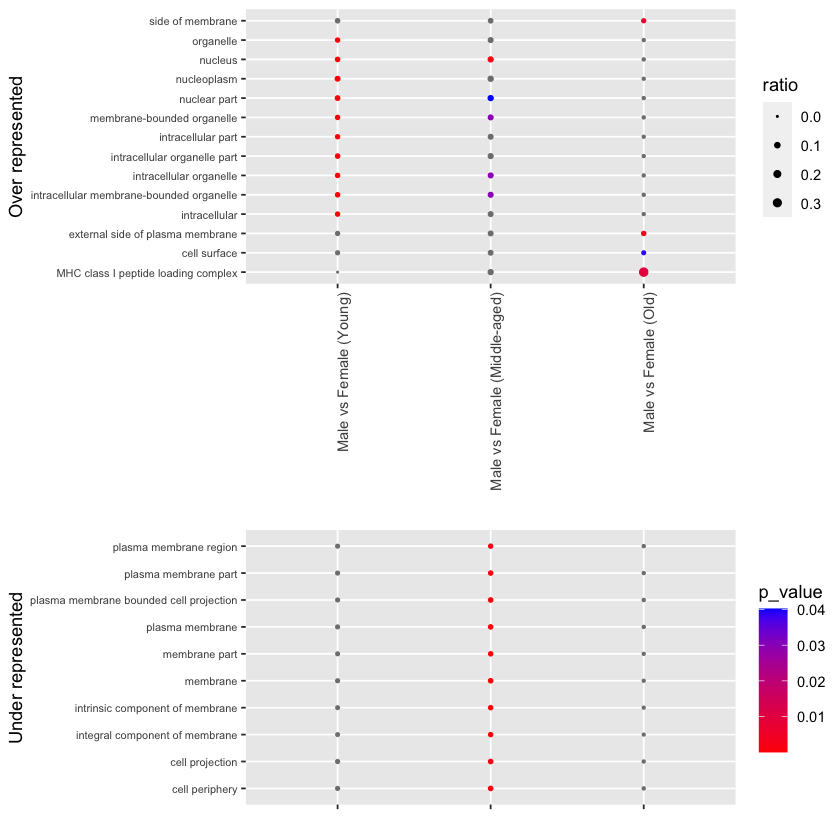

In [27]:
plot_top_go(deg, "CC", 10)

### Molecular functions

Dot-plot with the 10 most significant p-values for the different comparison

Using category as id variables

Using category, type as id variables



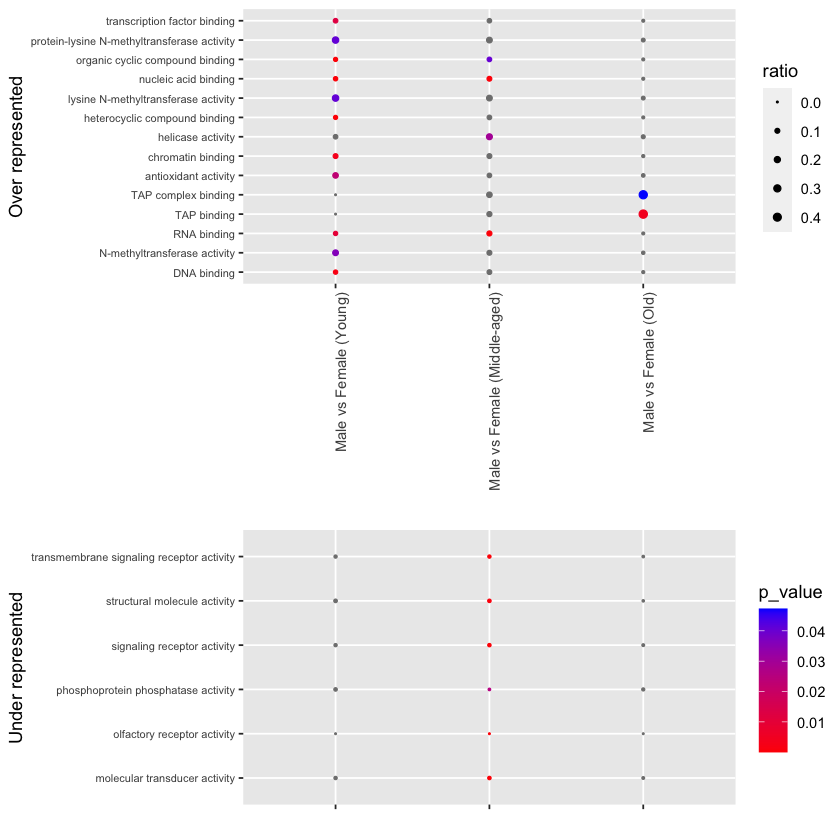

In [28]:
plot_top_go(deg, "MF", 10)

## KEGG pathways

In [29]:
deg = extract_KEGG_pathways(deg, dir_path)

Warning message in stack.default(getgo(l$sign_fc_deg$genes, "mm10", "geneSymbol", :
“non-vector elements will be ignored”


In [30]:
plot_kegg_pathways(deg$KEGG$over$category,
                   deg$sign_fc_deg,
                   paste(dir_path, '/kegg/over_repr_kegg/', sep=''))

[1] "Note: 50 of 1806 unique input IDs unmapped."


Warning message in file.rename(from = paste("mmu", cat, ".pathview.multi.png", sep = ""), :
“kann Datei 'mmu03010.pathview.multi.png' nicht in '../../results/dge/sex-driven-aging/4-analyze_sex_effect_given_ages//kegg/over_repr_kegg/mmu03010.pathview.multi.png' umbenennen. Grund 'No such file or directory'”


[1] "Note: 50 of 1806 unique input IDs unmapped."


Warning message in file.rename(from = paste("mmu", cat, ".pathview.multi.png", sep = ""), :
“kann Datei 'mmu04621.pathview.multi.png' nicht in '../../results/dge/sex-driven-aging/4-analyze_sex_effect_given_ages//kegg/over_repr_kegg/mmu04621.pathview.multi.png' umbenennen. Grund 'No such file or directory'”


[1] "Note: 50 of 1806 unique input IDs unmapped."


Warning message in file.rename(from = paste("mmu", cat, ".pathview.multi.png", sep = ""), :
“kann Datei 'mmu03015.pathview.multi.png' nicht in '../../results/dge/sex-driven-aging/4-analyze_sex_effect_given_ages//kegg/over_repr_kegg/mmu03015.pathview.multi.png' umbenennen. Grund 'No such file or directory'”


[1] "Note: 50 of 1806 unique input IDs unmapped."


Warning message in file.rename(from = paste("mmu", cat, ".pathview.multi.png", sep = ""), :
“kann Datei 'mmu04620.pathview.multi.png' nicht in '../../results/dge/sex-driven-aging/4-analyze_sex_effect_given_ages//kegg/over_repr_kegg/mmu04620.pathview.multi.png' umbenennen. Grund 'No such file or directory'”


Pathway graphs available in `../results/dge/sex-driven-aging/sex-effect/kegg/over_repr_kegg/` folder

In [31]:
plot_kegg_pathways(deg$under_represented_KEGG[,"category"],
                   deg$fc_deg,
                   paste(dir_path, '/kegg/under_repr_kegg/', sep=''))

Pathway graphs available in `../results/dge/sex-driven-aging/sex-effect/kegg/under_repr_kegg/` folder

# Citations

In [32]:
citation("pheatmap")


To cite package ‘pheatmap’ in publications use:

  Raivo Kolde (2019). pheatmap: Pretty Heatmaps. R package version
  1.0.12. https://CRAN.R-project.org/package=pheatmap

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {pheatmap: Pretty Heatmaps},
    author = {Raivo Kolde},
    year = {2019},
    note = {R package version 1.0.12},
    url = {https://CRAN.R-project.org/package=pheatmap},
  }

ATTENTION: This citation information has been auto-generated from the
package DESCRIPTION file and may need manual editing, see
‘help("citation")’.


In [33]:
citation("pathview")


To cite pathview:

  Luo, W. and Brouwer C., Pathview: an R/Bioconductor package for
  pathway-based data integration and visualization. Bioinformatics,
  2013, 29(14): 1830-1831, doi: 10.1093/bioinformatics/btt285

A BibTeX entry for LaTeX users is

  @Article{,
    author = {{Luo} and {Weijun} and {Brouwer} and {Cory}},
    title = {Pathview: an R/Bioconductor package for pathway-based data integration and visualization},
    journal = {Bioinformatics},
    year = {2013},
    doi = {10.1093/bioinformatics/btt285},
    volume = {29},
    number = {14},
    pages = {1830-1831},
  }

This free open-source software implements academic research by the
authors. Its development took a large amount of extra time and effort.
If you use it, please support the project by citing the listed journal
articles.
